## 4.10 Part 2 : Instacart

#### Content:

#### 5. Customers Profiling

#### 6. Visualisation for Customers Profile

#### 7. Aggregation of the Customers Profile

#### 8 & 9. Analysis of Customer Profile & Visualisation

#### Additional Visualisation to answer Key Questions

In [1]:
# Import Library

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import dataframe

path = r'/Users/queency_yustiawan/Study/CF/data analyst course/immersion/A4 exercise/Instacart Basket Analysis'

df = pd.read_pickle (os.path.join (path, '02 Data', 'Prepared Data', 'df_high_activity.pkl'))

#### 5. Customers Profiling

##### For the customers' profile analysis, we will seperate them based on 'income' and whether they are single or married, based on the 'family_status'.

In [3]:
# Checking income quartile

df['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

##### Based on data above we will categorise the income as: low income (<67,000), low middle income (67,001 - 97,000), upper middle income (97,001 - 128,000), and the high income (>128,001)

In [4]:
# Create 'customer_profile' flag

df.loc[(df['family_status'] == 'married') & (df['income'] < 67000), 'customer_profile'] = 'low income, married'

In [5]:
df.loc[(df['family_status'] == 'single') & (df['income'] < 67000), 'customer_profile'] = 'low income, single'

In [6]:
df.loc[(df['family_status'] == 'divorced/widowed') & (df['income'] < 67000), 'customer_profile'] = 'low income, others'

In [7]:
df.loc[(df['family_status'] == 'living with parents and siblings') & (df['income'] < 67000), 'customer_profile'] = 'low income, others'

In [8]:
df.loc[(df['family_status'] == 'married') & (df['income'] >= 67000) & (df['income'] < 97000), 'customer_profile'] = 'low middle income, married'

In [9]:
df.loc[(df['family_status'] == 'single') & (df['income'] >= 67000) & (df['income'] < 97000), 'customer_profile'] = 'low middle income, single'

In [10]:
df.loc[(df['family_status'] == 'divorced/widowed') & (df['income'] >= 67000) & (df['income'] < 97000), 'customer_profile'] = 'low middle income, others'

In [11]:
df.loc[(df['family_status'] == 'living with parents and siblings') & (df['income'] >= 67000) & (df['income'] < 97000), 'customer_profile'] = 'low middle income, others'

In [12]:
df.loc[(df['family_status'] == 'married') & (df['income'] >= 97000) & (df['income'] < 128000), 'customer_profile'] = 'upper middle income, married'

In [13]:
df.loc[(df['family_status'] == 'single') & (df['income'] >= 97000) & (df['income'] < 128000), 'customer_profile'] = 'upper middle income, single'

In [14]:
df.loc[(df['family_status'] == 'divorced/widowed') & (df['income'] >= 97000) & (df['income'] < 128000), 'customer_profile'] = 'upper middle income, others'

In [15]:
df.loc[(df['family_status'] == 'living with parents and siblings') & (df['income'] >= 97000) & (df['income'] < 128000), 'customer_profile'] = 'upper middle income, others'

In [16]:
df.loc[(df['family_status'] == 'married') & (df['income'] >= 128000), 'customer_profile'] = 'high income, married'

In [17]:
df.loc[(df['family_status'] == 'single') & (df['income'] >= 128000), 'customer_profile'] = 'high income, single'

In [18]:
df.loc[(df['family_status'] == 'divorced/widowed') & (df['income'] >= 128000), 'customer_profile'] = 'high income, others'

In [19]:
df.loc[(df['family_status'] == 'living with parents and siblings') & (df['income'] >= 128000), 'customer_profile'] = 'high income, others'

In [20]:
# Checking frequency

df['customer_profile'].value_counts(dropna = False)

customer_profile
high income, married            5788806
upper middle income, married    5623962
low middle income, married      5240185
low income, married             5090758
low middle income, single       1587509
low income, single              1584132
low middle income, others       1086372
high income, others             1030263
upper middle income, others     1023220
upper middle income, single      988721
low income, others               986588
high income, single              934048
Name: count, dtype: int64

##### Based on the frequency counts above, it shows that Instacart customers are mainly married with variety of income. While single customer with high income has very low number compared to them. 

#### 6. Visualisation for Customers Profile

Text(0, 0.5, 'profile')

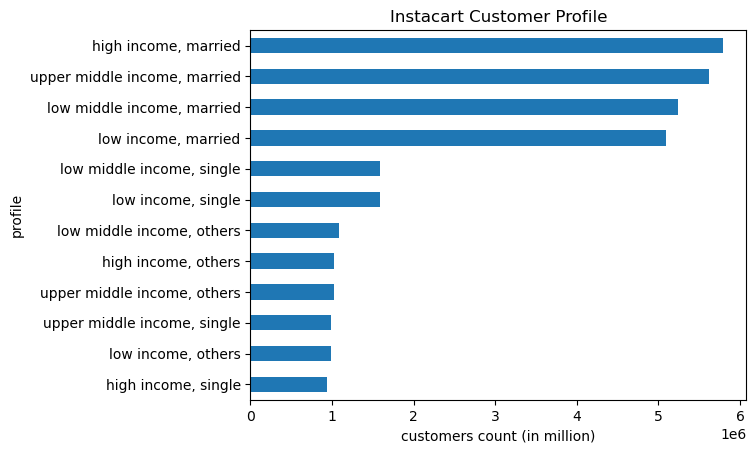

In [21]:
# Create Bar Charts for customers profile
bar = df['customer_profile'].value_counts().sort_values().plot(kind ='barh')

# Change the title
plt.title('Instacart Customer Profile')

# Add labels
plt.xlabel('customers count (in million)')
plt.ylabel('profile')

In [22]:
# Export the bar chart

bar.figure.savefig (os.path.join(path, '04 Analysis', 'Visualisations', 'bar_customer_profile.png'), bbox_inches = 'tight')

#### 7. Aggregation of the Customers Profile

In [23]:
# mean, min and max values of customers expense

expense = df.groupby('customer_profile').agg({'prices': ['mean' , 'min', 'max']})

In [24]:
expense

prices              
                                   mean  min      max
customer_profile                                     
high income, married          21.272800  1.0  99999.0
high income, others           19.685236  1.0  99999.0
high income, single           28.721894  1.0  99999.0
low income, married            7.262562  1.0  14900.0
low income, others             7.301103  1.0     25.0
low income, single             7.426331  1.0  14900.0
low middle income, married     8.879954  1.0  99999.0
low middle income, others      8.636553  1.0  99999.0
low middle income, single      8.215659  1.0  99999.0
upper middle income, married   9.435823  1.0  99999.0
upper middle income, others    9.549046  1.0  99999.0
upper middle income, single   11.660654  1.0  99999.0

In [25]:
# mean, min and max values of customers usage frequency

usage_freq = df.groupby('customer_profile').agg({'order_interval_days': ['mean' , 'min', 'max']})

In [26]:
usage_freq

order_interval_days           
                                            mean  min   max
customer_profile                                           
high income, married                   10.785879  0.0  30.0
high income, others                    10.662712  0.0  30.0
high income, single                    10.682119  0.0  30.0
low income, married                    10.966581  0.0  30.0
low income, others                     11.023402  0.0  30.0
low income, single                     10.928868  0.0  30.0
low middle income, married             10.733243  0.0  30.0
low middle income, others              10.539865  0.0  30.0
low middle income, single              10.802647  0.0  30.0
upper middle income, married           10.806972  0.0  30.0
upper middle income, others            10.800902  0.0  30.0
upper middle income, single            10.770929  0.0  30.0

#### 8 & 9. Analysis of Customer Profile & Visualisation

##### Brand Loyalty Analysis

In [93]:
# Create a subset to analyse brand loyalty across the region

df_loyalty = df[['user_id', 'region', 'customer_profile', 'family_status', 'income_flag', 'loyalty_flag']]

In [28]:
# Comparing the brand loyalty across the region

region_loyalty = pd.crosstab(df_loyalty['region'], df_loyalty['loyalty_flag'], dropna = False)

In [29]:
region_loyalty

loyalty_flag,Loyal Customer,New Customer,Regular Customer
region,,,
Midwest,2373774,1136761,3750978
Northeast,1841785,842156,2780744
South,3405844,1593664,5311631
West,2662690,1231114,4033423


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Midwest'),
  Text(1, 0, 'Northeast'),
  Text(2, 0, 'South'),
  Text(3, 0, 'West')])

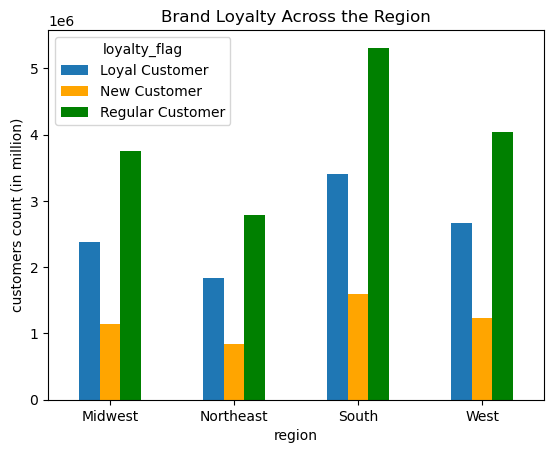

In [34]:
# Create bar chart for above result

region_loyalty_group = df_loyalty.groupby(['region', 'loyalty_flag']).size().unstack()
bar_region_loyalty = region_loyalty_group.plot(kind = 'bar', color = ['#1F77B4','orange','green'])

# Change the title
plt.title('Brand Loyalty Across the Region')

# Add labels
plt.xlabel('region')
plt.ylabel('customers count (in million)')
plt.xticks(rotation = 0)

In [35]:
# Export the bar chart

bar_region_loyalty.figure.savefig (os.path.join(path, '04 Analysis', 'Visualisations', 'bar_loyalty_region.png'), bbox_inches = 'tight')

In [82]:
# Comparing the brand loyalty across the customer profile

cp_loyalty = pd.crosstab(df_loyalty['family_status'], df_loyalty['loyalty_flag'], dropna = False)

In [83]:
cp_loyalty

loyalty_flag,Loyal Customer,New Customer,Regular Customer
family_status,,,
divorced/widowed,882722,403781,1358768
living with parents and siblings,492749,221779,766644
married,7202500,3380651,11160560
single,1706122,797484,2590804


(array([       0.,  2000000.,  4000000.,  6000000.,  8000000., 10000000.,
        12000000.]),
 [Text(0.0, 0, '0.0'),
  Text(2000000.0, 0, '0.2'),
  Text(4000000.0, 0, '0.4'),
  Text(6000000.0, 0, '0.6'),
  Text(8000000.0, 0, '0.8'),
  Text(10000000.0, 0, '1.0'),
  Text(12000000.0, 0, '1.2')])

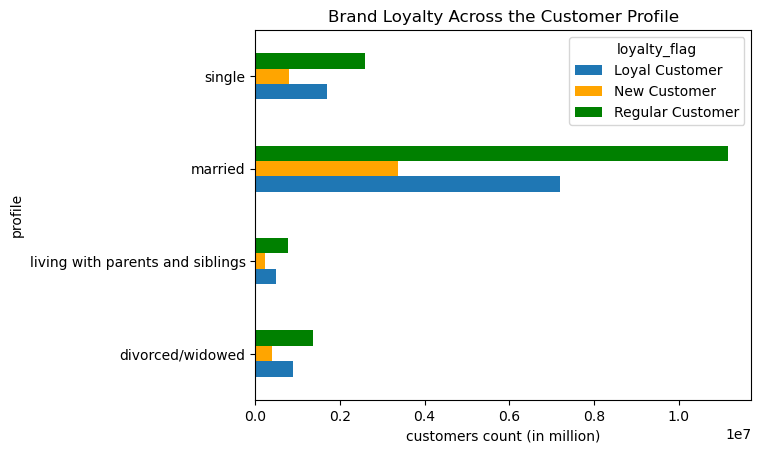

In [84]:
# Create bar chart for above result

cp_loyalty_group = df_loyalty.groupby(['family_status', 'loyalty_flag']).size().unstack()
bar_cp_loyalty = cp_loyalty_group.plot(kind = 'barh', color = ['#1F77B4','orange','green'])

# Change the title
plt.title('Brand Loyalty Across the Customer Profile')

# Add labels
plt.ylabel('profile')
plt.xlabel('customers count (in million)')
plt.xticks(rotation = 0)

In [85]:
# Export the bar chart

bar_cp_loyalty.figure.savefig (os.path.join(path, '04 Analysis', 'Visualisations', 'bar_loyalty_cp.png'), bbox_inches = 'tight')

In [86]:
# Create 'income_flag'

df.loc[(df['income'] < 67000), 'income_flag'] = 'low income'

In [87]:
df.loc[(df['income'] >= 67000) & (df['income'] < 97000), 'income_flag'] = 'low middle income'

In [88]:
df.loc[(df['income'] >= 97000) & (df['income'] < 128000), 'income_flag'] = 'upper middle income'

In [89]:
df.loc[(df['income'] >= 128000), 'income_flag'] = 'high income'

In [90]:
df['income_flag'].value_counts(dropna = False)

income_flag
low middle income      7914066
high income            7753117
low income             7661478
upper middle income    7635903
Name: count, dtype: int64

In [94]:
# Comparing the brand loyalty based on the customer's income 

income_loyalty = pd.crosstab(df_loyalty['income_flag'], df_loyalty['loyalty_flag'], dropna = False)

In [95]:
income_loyalty

loyalty_flag,Loyal Customer,New Customer,Regular Customer
income_flag,,,
high income,2569416,1175621,4008080
low income,2469238,1299310,3892930
low middle income,2679825,1176322,4057919
upper middle income,2565614,1152442,3917847


(array([0, 1, 2, 3]),
 [Text(0, 0, 'high income'),
  Text(1, 0, 'low income'),
  Text(2, 0, 'low middle income'),
  Text(3, 0, 'upper middle income')])

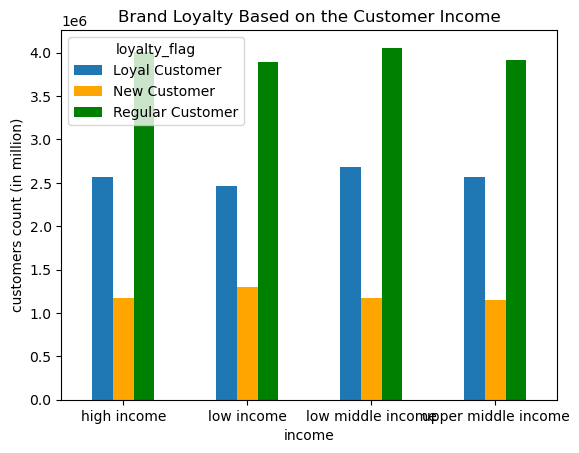

In [96]:
# Create bar chart for above result

income_loyalty_group = df_loyalty.groupby(['income_flag', 'loyalty_flag']).size().unstack()
bar_income_loyalty = income_loyalty_group.plot(kind = 'bar', color = ['#1F77B4','orange','green'])

# Change the title
plt.title('Brand Loyalty Based on the Customer Income')

# Add labels
plt.xlabel('income')
plt.ylabel('customers count (in million)')
plt.xticks(rotation = 0)

In [97]:
# Export the bar chart

bar_income_loyalty.figure.savefig (os.path.join(path, '04 Analysis', 'Visualisations', 'bar_loyalty_income.png'), bbox_inches = 'tight')

In [98]:
# Comparing the brand loyalty across the customer profile

cp2_loyalty = pd.crosstab(df_loyalty['customer_profile'], df_loyalty['loyalty_flag'], dropna = False)
cp2_loyalty

loyalty_flag,Loyal Customer,New Customer,Regular Customer
customer_profile,,,
"high income, married",1895043,880979,3012784
"high income, others",349159,152220,528884
"high income, single",325214,142422,466412
"low income, married",1642613,861575,2586570
"low income, others",306009,167588,512991
"low income, single",520616,270147,793369
"low middle income, married",1763352,784575,2692258
"low middle income, others",386876,154602,544894
"low middle income, single",529597,237145,820767


(array([      0.,  500000., 1000000., 1500000., 2000000., 2500000.,
        3000000., 3500000.]),
 [Text(0.0, 0, '0.0'),
  Text(500000.0, 0, '0.5'),
  Text(1000000.0, 0, '1.0'),
  Text(1500000.0, 0, '1.5'),
  Text(2000000.0, 0, '2.0'),
  Text(2500000.0, 0, '2.5'),
  Text(3000000.0, 0, '3.0'),
  Text(3500000.0, 0, '3.5')])

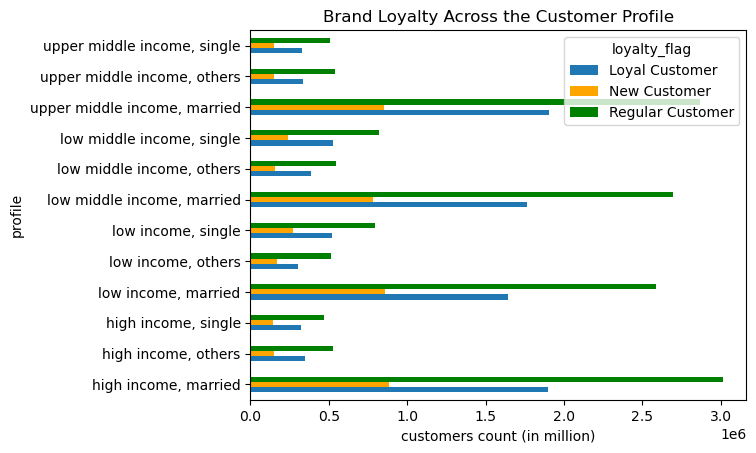

In [99]:
# Create bar chart for above result

cp2_loyalty_group = df_loyalty.groupby(['customer_profile', 'loyalty_flag']).size().unstack()
bar_cp_loyalty = cp2_loyalty_group.plot(kind = 'barh', color = ['#1F77B4','orange','green'])

# Change the title
plt.title('Brand Loyalty Across the Customer Profile')

# Add labels
plt.ylabel('profile')
plt.xlabel('customers count (in million)')
plt.xticks(rotation = 0)

In [100]:
# Export the bar chart

bar_cp_loyalty.figure.savefig (os.path.join(path, '04 Analysis', 'Visualisations', 'bar_loyalty_cp2.png'), bbox_inches = 'tight')

##### Customers Spending Analysis

In [127]:
# Create a subset to analyse customers' spendings across the region

df_spending = df[['user_id', 'region', 'customer_profile', 'spending_flag', 'income_flag', 'spending_avg']]

In [55]:
# Comparing the customers' spending across the region

region_spending = pd.crosstab(df_spending['region'], df_spending['spending_flag'], dropna = False)
region_spending

spending_flag,High Spender,Low Spender
region,,
Midwest,148678,7112835
Northeast,103120,5361565
South,199339,10111800
West,152288,7774939


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Midwest'),
  Text(1, 0, 'Northeast'),
  Text(2, 0, 'South'),
  Text(3, 0, 'West')])

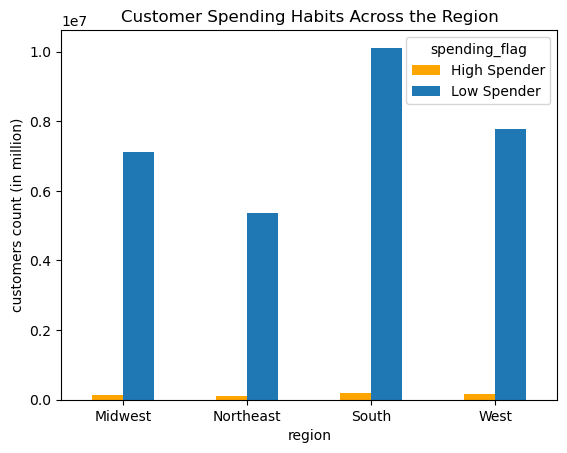

In [52]:
# Create bar chart for above result

region_spending_group = df_spending.groupby(['region', 'spending_flag']).size().unstack()
bar_region_spending = region_spending_group.plot(kind = 'bar',color = ['orange','#1F77B4'])

# Change the title
plt.title('Customer Spending Habits Across the Region')

# Add labels
plt.xlabel('region')
plt.ylabel('customers count (in million)')
plt.xticks(rotation = 0)

In [58]:
# Export the bar chart

bar_region_spending.figure.savefig (os.path.join(path, '04 Analysis', 'Visualisations', 'bar_region_spending.png'), bbox_inches = 'tight')

In [54]:
# Comparing the spending habits across the customer profile

cp_spending = pd.crosstab(df_spending['customer_profile'], df_spending['spending_flag'], dropna = False)
cp_spending

spending_flag,High Spender,Low Spender
customer_profile,,
"high income, married",322603,5466203
"high income, others",56260,974003
"high income, single",71273,862775
"low income, married",13052,5077706
"low income, others",1691,984897
"low income, single",5429,1578703
"low middle income, married",38200,5201985
"low middle income, others",7423,1078949
"low middle income, single",6604,1580905


(array([      0., 1000000., 2000000., 3000000., 4000000., 5000000.,
        6000000.]),
 [Text(0.0, 0, '0'),
  Text(1000000.0, 0, '1'),
  Text(2000000.0, 0, '2'),
  Text(3000000.0, 0, '3'),
  Text(4000000.0, 0, '4'),
  Text(5000000.0, 0, '5'),
  Text(6000000.0, 0, '6')])

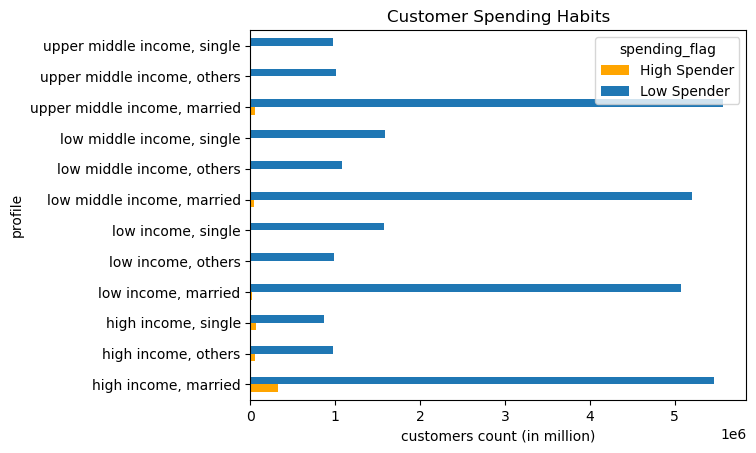

In [57]:
# Create bar chart for above result

cp_spending_group = df_spending.groupby(['customer_profile', 'spending_flag']).size().unstack()
bar_cp_spending = cp_spending_group.plot(kind = 'barh',color = ['orange','#1F77B4'])

# Change the title
plt.title('Customer Spending Habits')

# Add labels
plt.ylabel('profile')
plt.xlabel('customers count (in million)')
plt.xticks(rotation = 0)

In [59]:
# Export the bar chart

bar_cp_spending.figure.savefig (os.path.join(path, '04 Analysis', 'Visualisations', 'bar_cp_spending.png'), bbox_inches = 'tight')

In [102]:
# Comparing the customers' spending across the income range

income_spending = pd.crosstab(df_spending['income_flag'], df_spending['spending_flag'], dropna = False)
income_spending

spending_flag,High Spender,Low Spender
income_flag,,
high income,450136,7302981
low income,20172,7641306
low middle income,52227,7861839
upper middle income,80890,7555013


(array([0, 1, 2, 3]),
 [Text(0, 0, 'high income'),
  Text(1, 0, 'low income'),
  Text(2, 0, 'low middle income'),
  Text(3, 0, 'upper middle income')])

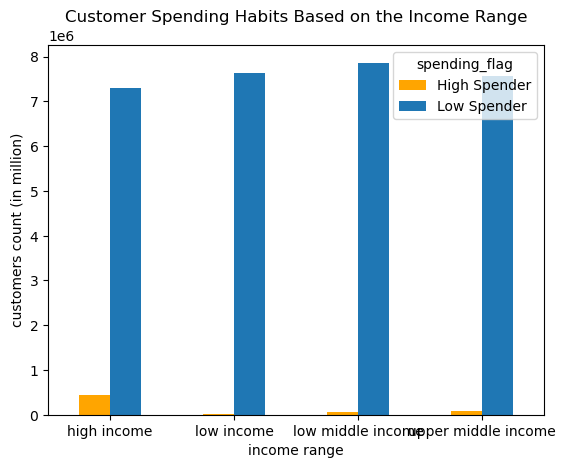

In [103]:
# Create bar chart for above result

income_spending_group = df_spending.groupby(['income_flag', 'spending_flag']).size().unstack()
bar_income_spending = income_spending_group.plot(kind = 'bar',color = ['orange','#1F77B4'])

# Change the title
plt.title('Customer Spending Habits Based on the Income Range')

# Add labels
plt.xlabel('income range')
plt.ylabel('customers count (in million)')
plt.xticks(rotation = 0)

##### Customers Order Frequency Analysis

In [160]:
# Create a subset to analyse customers' order frequency across the region

df_frequency = df[['user_id', 'region', 'customer_profile', 'frequency_flag', 'family_status', 'age_group', 'income_flag', 'loyalty_flag']]

In [62]:
# Comparing the customers' order frequency across the region

region_freq = pd.crosstab(df_frequency['region'], df_frequency['frequency_flag'], dropna = False)
region_freq

frequency_flag,Frequent customer,Non-frequenct customer,Regular customer
region,,,
Midwest,4935393,690030,1636090
Northeast,3740982,496911,1226792
South,7073789,968006,2269344
West,5454312,740028,1732887


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Midwest'),
  Text(1, 0, 'Northeast'),
  Text(2, 0, 'South'),
  Text(3, 0, 'West')])

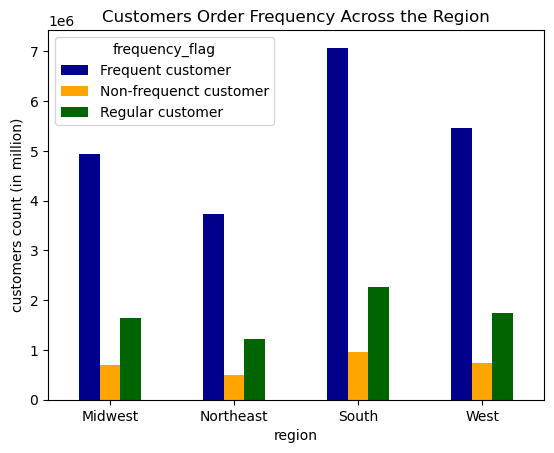

In [73]:
# Create bar chart for above result

region_freq_group = df_frequency.groupby(['region', 'frequency_flag']).size().unstack()
bar_region_freq = region_freq_group.plot(kind = 'bar', color = ['darkblue','orange','darkgreen'])

# Change the title
plt.title('Customers Order Frequency Across the Region')

# Add labels
plt.xlabel('region')
plt.ylabel('customers count (in million)')
plt.xticks(rotation = 0)

In [74]:
# Export the bar chart

bar_region_freq.figure.savefig (os.path.join(path, '04 Analysis', 'Visualisations', 'bar_region_freq.png'), bbox_inches = 'tight')

In [108]:
# Comparing the customers' order frequency across different family status

family_freq = pd.crosstab(df_frequency['family_status'], df_frequency['frequency_flag'], dropna = False)
family_freq

frequency_flag,Frequent customer,Non-frequenct customer,Regular customer
family_status,,,
divorced/widowed,1819123,243934,582214
living with parents and siblings,1030514,138646,312012
married,14888825,2039823,4815063
single,3466014,472572,1155824


(array([       0.,  2000000.,  4000000.,  6000000.,  8000000., 10000000.,
        12000000., 14000000., 16000000.]),
 [Text(0.0, 0, '0.0'),
  Text(2000000.0, 0, '0.2'),
  Text(4000000.0, 0, '0.4'),
  Text(6000000.0, 0, '0.6'),
  Text(8000000.0, 0, '0.8'),
  Text(10000000.0, 0, '1.0'),
  Text(12000000.0, 0, '1.2'),
  Text(14000000.0, 0, '1.4'),
  Text(16000000.0, 0, '1.6')])

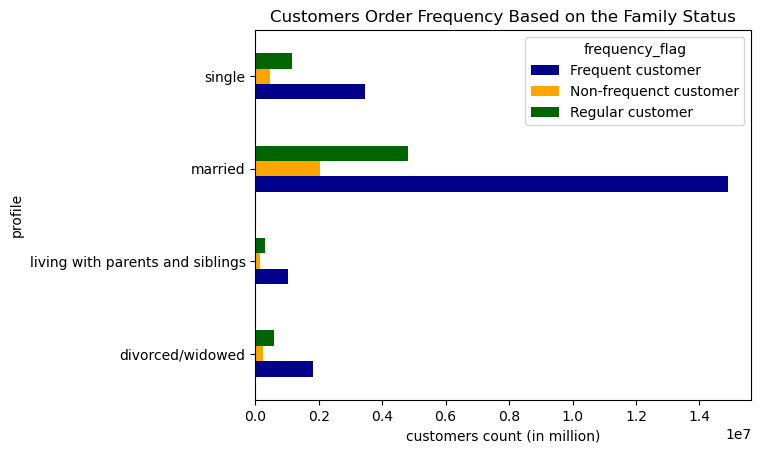

In [110]:
# Create bar chart for above result

family_freq_group = df_frequency.groupby(['family_status', 'frequency_flag']).size().unstack()
bar_family_freq = family_freq_group.plot(kind = 'barh', color = ['darkblue','orange','darkgreen'])

# Change the title
plt.title('Customers Order Frequency Based on the Family Status')

# Add labels
plt.ylabel('profile')
plt.xlabel('customers count (in million)')
plt.xticks(rotation = 0)

In [111]:
# Export the bar chart

bar_family_freq.figure.savefig (os.path.join(path, '04 Analysis', 'Visualisations', 'bar_family_freq.png'), bbox_inches = 'tight')

In [149]:
# Create 'age groups'

df.loc[(df['age'] < 20), 'age_group'] = 'young'

In [150]:
df.loc[(df['age'] >= 20) & (df['age'] < 45), 'age_group'] = 'Adult'

In [151]:
df.loc[(df['age'] >= 45) & (df['age'] < 65), 'age_group'] = 'Middle-Aged'

In [152]:
df.loc[(df['age'] >= 65), 'age_group'] = 'Senior'

In [153]:
df['age_group'].value_counts(dropna = False)

age_group
Adult          12104435
Middle-Aged     9690051
Senior          8195544
young            974534
Name: count, dtype: int64

In [157]:
# Comparing the customers' order frequency across different age group

age_freq = pd.crosstab(df_frequency['age_group'], df_frequency['frequency_flag'], dropna = False)
age_freq

frequency_flag,Frequent customer,Non-frequenct customer,Regular customer
age_group,,,
Adult,8294087,1114347,2696001
Middle-Aged,6610186,928228,2151637
Senior,5630976,760132,1804436
young,669227,92268,213039


(array([      0., 1000000., 2000000., 3000000., 4000000., 5000000.,
        6000000., 7000000., 8000000., 9000000.]),
 [Text(0.0, 0, '0'),
  Text(1000000.0, 0, '1'),
  Text(2000000.0, 0, '2'),
  Text(3000000.0, 0, '3'),
  Text(4000000.0, 0, '4'),
  Text(5000000.0, 0, '5'),
  Text(6000000.0, 0, '6'),
  Text(7000000.0, 0, '7'),
  Text(8000000.0, 0, '8'),
  Text(9000000.0, 0, '9')])

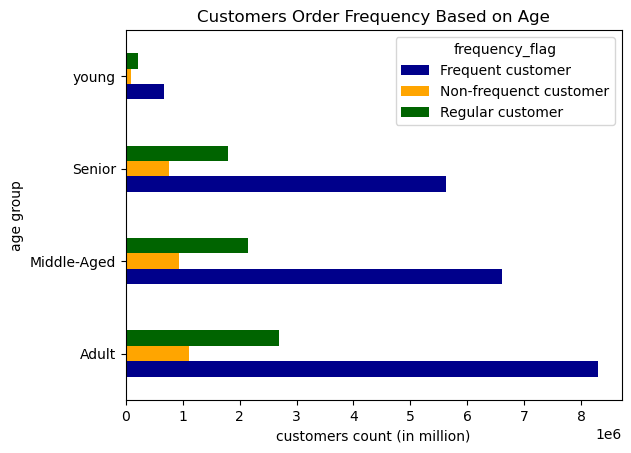

In [158]:
# Create bar chart for above result

age_freq_group = df_frequency.groupby(['age_group', 'frequency_flag']).size().unstack()
bar_age_freq = age_freq_group.plot(kind = 'barh', color = ['darkblue','orange','darkgreen'])

# Change the title
plt.title('Customers Order Frequency Based on Age')

# Add labels
plt.ylabel('age group')
plt.xlabel('customers count (in million)')
plt.xticks(rotation = 0)

In [159]:
# Export the bar chart

bar_age_freq.figure.savefig (os.path.join(path, '04 Analysis', 'Visualisations', 'bar_age2_freq.png'), bbox_inches = 'tight')

In [162]:
# Comparing the customers' order frequency across different loyalty group

loyal_freq = pd.crosstab(df_frequency['loyalty_flag'], df_frequency['frequency_flag'], dropna = False)
loyal_freq

frequency_flag,Frequent customer,Non-frequenct customer,Regular customer
loyalty_flag,,,
Loyal Customer,10279960,0,4133
New Customer,1293294,1983500,1526901
Regular Customer,9631222,911475,5334079


(array([0, 1, 2]),
 [Text(0, 0, 'Loyal Customer'),
  Text(1, 0, 'New Customer'),
  Text(2, 0, 'Regular Customer')])

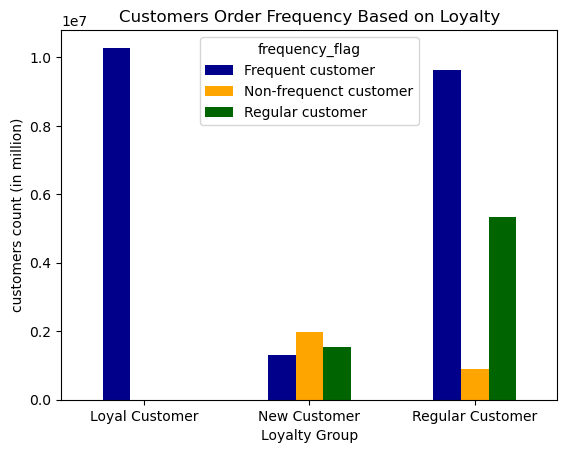

In [163]:
# Create bar chart for above result

loyal_freq_group = df_frequency.groupby(['loyalty_flag', 'frequency_flag']).size().unstack()
bar_loyal_freq = loyal_freq_group.plot(kind = 'bar', color = ['darkblue','orange','darkgreen'])

# Change the title
plt.title('Customers Order Frequency Based on Loyalty')

# Add labels
plt.xlabel('Loyalty Group')
plt.ylabel('customers count (in million)')
plt.xticks(rotation = 0)

In [164]:
# Export the bar chart

bar_loyal_freq.figure.savefig (os.path.join(path, '04 Analysis', 'Visualisations', 'bar_loyal_freq.png'), bbox_inches = 'tight')

In [165]:
# Comparing the customers' order frequency across different customer profile

cp_freq = pd.crosstab(df_frequency['customer_profile'], df_frequency['frequency_flag'], dropna = False)
cp_freq

frequency_flag,Frequent customer,Non-frequenct customer,Regular customer
customer_profile,,,
"high income, married",3984539,527838,1276429
"high income, others",712770,92497,224996
"high income, single",642052,81861,210135
"low income, married",3425336,525572,1139850
"low income, others",674613,100464,211511
"low income, single",1067276,159261,357595
"low middle income, married",3618033,468720,1153432
"low middle income, others",762392,98685,225295
"low middle income, single",1080800,141760,364949


(array([      0.,  500000., 1000000., 1500000., 2000000., 2500000.,
        3000000., 3500000., 4000000., 4500000.]),
 [Text(0.0, 0, '0.0'),
  Text(500000.0, 0, '0.5'),
  Text(1000000.0, 0, '1.0'),
  Text(1500000.0, 0, '1.5'),
  Text(2000000.0, 0, '2.0'),
  Text(2500000.0, 0, '2.5'),
  Text(3000000.0, 0, '3.0'),
  Text(3500000.0, 0, '3.5'),
  Text(4000000.0, 0, '4.0'),
  Text(4500000.0, 0, '4.5')])

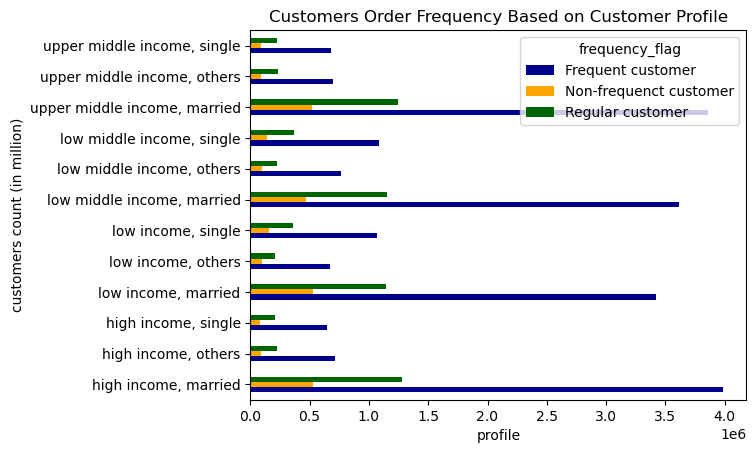

In [167]:
# Create bar chart for above result

cp_freq_group = df_frequency.groupby(['customer_profile', 'frequency_flag']).size().unstack()
bar_cp_freq = cp_freq_group.plot(kind = 'barh', color = ['darkblue','orange','darkgreen'])

# Change the title
plt.title('Customers Order Frequency Based on Customer Profile')

# Add labels
plt.xlabel('profile')
plt.ylabel('customers count (in million)')
plt.xticks(rotation = 0)

In [168]:
# Export the bar chart

bar_cp_freq.figure.savefig (os.path.join(path, '04 Analysis', 'Visualisations', 'bar_cp_freq.png'), bbox_inches = 'tight')

#### Additional Visualisation to answer Key Questions

In [135]:
df['price_range_loc'].value_counts(dropna = False)

price_range_loc
Mid-range product     20891771
Low-range product      9674840
High-range product      397953
Name: count, dtype: int64

(array([0, 1, 2]),
 [Text(0, 0, 'Mid-range product'),
  Text(1, 0, 'Low-range product'),
  Text(2, 0, 'High-range product')])

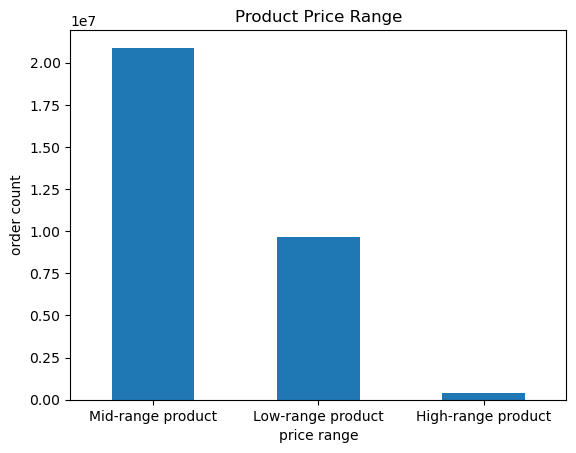

In [141]:
# Create chart for price range 

bar_price_range = df['price_range_loc'].value_counts().plot(kind= 'bar')

# Change the title
plt.title('Product Price Range')

# Add labels
plt.ylabel('order count')
plt.xlabel('price range')
plt.xticks(rotation = 0)

In [142]:
# Export the bar chart

bar_price_range.figure.savefig (os.path.join(path, '04 Analysis', 'Visualisations', 'bar_price_range.png'), bbox_inches = 'tight')

Text(0.5, 0, 'order count (in million)')

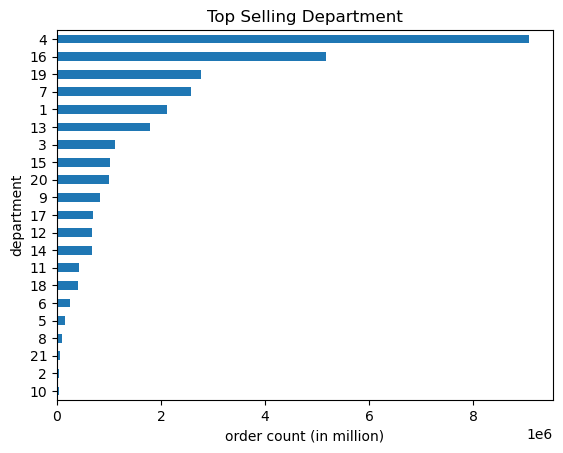

In [145]:
# Most popular product departments 
bar_department = df['department_id'].value_counts().sort_values().plot.barh()

# Change the title
plt.title('Top Selling Department')

# Add labels
plt.ylabel('department')
plt.xlabel('order count (in million)')

In [146]:
# Export the bar chart

bar_department.figure.savefig (os.path.join(path, '04 Analysis', 'Visualisations', 'bar_department.png'), bbox_inches = 'tight')

Text(0.5, 0, 'order count (in million)')

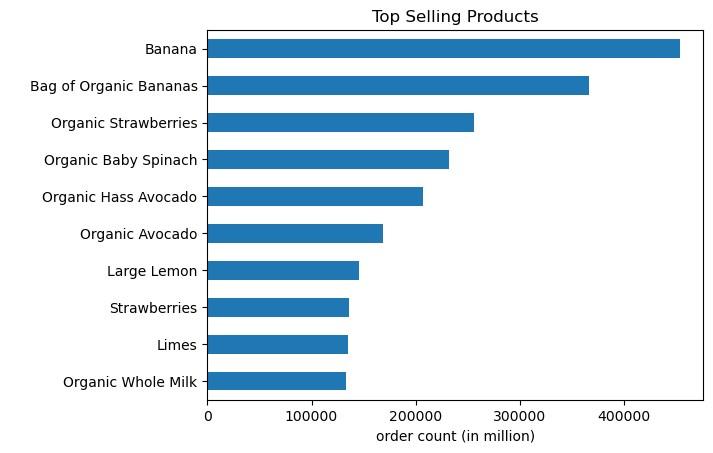

In [147]:
# Top Selling Products
bar_product = df['product_name'].value_counts(dropna = False).head(10).sort_values(ascending = True).plot(kind = 'barh')

# Change the title
plt.title('Top Selling Products')

# Add labels
plt.ylabel(' ')
plt.xlabel('order count (in million)')

In [148]:
# Export the bar chart

bar_product.figure.savefig (os.path.join(path, '04 Analysis', 'Visualisations', 'bar_product.png'), bbox_inches = 'tight')